# Emotion Detection Project
## Importing All Libraries required


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer



About Dataset
Emotions Detection Dataset
This dataset is a comprehensive collection of text samples labeled with emotions. It is designed for training and testing emotion detection models using Natural Language Processing (NLP) techniques.
A freely available dataset for emotion detection from text, designed to support researchers, developers, and enthusiasts in building and improving emotion analysis models.

Dataset Details

Data Type: Text

File Format: CSV

Emotion Categories:

😊 Joy

😢 Sadness

😨 Fear

😡 Anger

😲 Surprise

Key Features

Pre-labeled text samples for supervised learning tasks.

Easy to integrate into machine learning pipelines.

Open for all to use and modify.


Usage

This dataset is ideal for researchers and developers working on emotion detection, sentiment analysis, or other NLP tasks.

## Data loading

In [140]:
data=pd.read_csv("emotion_dataset.csv")
data

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


## Exploratory Data Analysis(EDA)
The data shape is (34791,2)

The data has missing values in clean_text column but i think that i will not remove them as we will train our model only on text not on clean_text column as both are almost same, so that our model not get confused.

Most of the emotions are of joy and least are of shame


In [141]:
data.shape
data.info()
data.head()
data['Emotion'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34792 non-null  int64 
 1   Emotion     34792 non-null  object
 2   Text        34792 non-null  object
 3   Clean_Text  34326 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

In [142]:
# Missing value
data.isnull().sum().sort_index(ascending=True)

Clean_Text    466
Emotion         0
Text            0
Unnamed: 0      0
dtype: int64

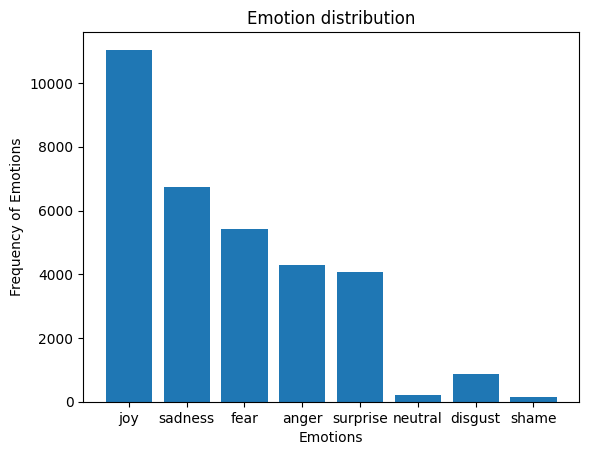

In [143]:
# visulizing the data
Frequency_of_each_emotion=[11045,6722,5410,4297,4062,225,856,146]
emotions=['joy', 'sadness', 'fear','anger',"surprise","neutral",'disgust','shame']
plt.bar(emotions,Frequency_of_each_emotion)

plt.title("Emotion distribution")
plt.xlabel("Emotions")
plt.ylabel("Frequency of Emotions")
plt.show()

## Data Splitting 

In [144]:
data.columns

Index(['Unnamed: 0', 'Emotion', 'Text', 'Clean_Text'], dtype='object')

In [145]:
# As we donot want id and clean_text columns so we will remove them from data
data=data[["Emotion","Text"]]
data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [146]:
# Creating X and y 
X=data["Text"]
y=data["Emotion"]
print(len(X))
print(len(y))

34792
34792


## NLP

### Stemming

In [147]:

import re
ps=PorterStemmer()
corpus=[]

for i in range(0,len(X)):
    review=re.sub("[^a-zA-Z]"," ",X[i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words("English")]
    review=" ".join(review)
    corpus.append(review)

### Extracting vocabulory and vocabulory size

In [148]:
# Extracting the vocabulary from corpus 
vocabulory=[]
i=0
for each in corpus:
    words=word_tokenize(each)
    for word in words:
        if word not in vocabulory:
            vocabulory.append(word)


In [149]:
# Checking the vocabulory and getting vocabulory size
import pandas as pd
voc=pd.Series(vocabulory)
print(voc.duplicated().sum())
voc_size=len(vocabulory)
print("Vocabulory size is: ",voc_size)

0
Vocabulory size is:  28581


### One-Hot Representation of Corpus

In [150]:
# One hot representation of the X of model training
vocabulory=str(vocabulory)
one_hot_repr=[one_hot("".join(sentence),voc_size) for sentence in corpus]
one_hot_repr[1]

[2067, 2483, 8465, 7488, 15839]

In [151]:
print(corpus[1])
print(one_hot_repr[1])

sage act upgrad list tommorow
[2067, 2483, 8465, 7488, 15839]


### Padding

In [152]:
# Finding the sentence of max length
max=len(one_hot_repr[1])
for each in one_hot_repr:
    if len(each)>max:
        max=len(each)

print("The lenght of total one_hot representation(no of sentences) is",len(one_hot_repr))

print("The length of longest sentence is", max)

The lenght of total one_hot representation(no of sentences) is 34792
The length of longest sentence is 100


In [153]:
padded_vectors=pad_sequences(one_hot_repr,maxlen=max,padding="pre")
len(padded_vectors)

34792

## Deep Learning

### Defining Model, Adding layers and then Compiling models

In [178]:
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(Embedding(input_dim=voc_size,output_dim=20,input_length=max))
model.add(LSTM(150))
model.add(Dense(8, activation='softmax'))
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')



e:\vs code software\python\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [179]:
# Getting summary
model.build((None,15))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 15, 20)         │       571,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 150)            │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │         1,208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,428 (2.58 MB)

 Trainable params: 675,428 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [180]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
y_encoded = to_categorical(LabelEncoder().fit_transform(y)).astype(np.float32)

In [181]:
X_final=np.array(padded_vectors)
y_final=np.array(y)

In [182]:
print(X_final.shape)
print(y_final.shape)

(34792, 100)
(34792,)


In [183]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_encoded,train_size=0.8,test_size=0.2,random_state=42)


In [184]:
print(X_train.dtype)
print(y_train.dtype)

int32
float32


In [186]:
model.fit(X_train,y_train,epochs=5, batch_size=20)

Epoch 1/5
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 120s 86ms/step - accuracy: 0.6428 - loss: 1.0319
Epoch 2/5
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 123s 88ms/step - accuracy: 0.7534 - loss: 0.7456
Epoch 3/5
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 114s 82ms/step - accuracy: 0.8089 - loss: 0.5844
Epoch 4/5
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 116s 83ms/step - accuracy: 0.8484 - loss: 0.4780
Epoch 5/5
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 126s 90ms/step - accuracy: 0.8689 - loss: 0.4091


In [188]:
y_pred=model.predict(X_test)

218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step


### Model Testing and metrics

#### Convert Probabilities (y_pred) to Integer Labels:

In [194]:
import numpy as np
y_pred_labels = np.argmax(y_pred, axis=1)
# y_pred_labels will now be a 1D NumPy array like [0, 1, 2, ...]

#### Convert True Labels (y_test) to Integer Labels:

In [197]:
# Assuming y_test is your one-hot encoded NumPy array (e.g., shape (34792, 8))
y_true_labels = np.argmax(y_test, axis=1)
# y_true_labels will now be a 1D NumPy array like [0, 1, 0, ...]

In [202]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_true_labels,y_pred_labels)
print("Accuracy Score: ",accuracy)

Accuracy Score:  0.6039660870814773


In [200]:
from sklearn.metrics import classification_report
classification_Report=classification_report(y_pred_labels,y_true_labels)
print(classification_Report)

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       806
           1       0.26      0.34      0.29       151
           2       0.67      0.70      0.69      1066
           3       0.69      0.65      0.67      2328
           4       0.68      0.77      0.72       430
           5       0.55      0.53      0.54      1391
           6       0.78      0.75      0.77        24
           7       0.45      0.46      0.45       763

    accuracy                           0.60      6959
   macro avg       0.58      0.60      0.59      6959
weighted avg       0.61      0.60      0.60      6959



In [203]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_labels,y_true_labels)

array([[ 457,   26,   64,  105,   18,  104,    1,   31],
       [  18,   52,    9,   18,    0,   31,    1,   22],
       [  61,   22,  745,   97,   15,   78,    1,   47],
       [ 113,   37,  110, 1520,   73,  255,    1,  219],
       [  22,    1,   13,   40,  329,   17,    0,    8],
       [ 122,   36,   96,  270,   38,  733,    0,   96],
       [   1,    3,    1,    1,    0,    0,   18,    0],
       [  42,   25,   66,  163,    8,  109,    1,  349]], dtype=int64)

## Saving the model


In [204]:
model.save("sentiment_model.keras")